# Modeling Spatiotemporal Scientific Data

In [1]:
# https://daymet.ornl.gov/citations

![](https://esri.box.com/shared/static/cqsveajw4prlpdbfbrooeubi4pbyrw2e.jpg)

![](https://esri.box.com/shared/static/6p2jk9hk83fsa4ncj767gmuydxpqrx3r.jpg)

# Monthly daytime maximum temperature
- 38 NetCDF Files (1980 - 2017)
- 1 file per year with 12 months of data in each file

# DAYMET Temperature Data

Thornton, P.E., M.M. Thornton, B.W. Mayer, Y. Wei, R. Devarakonda, R.S. Vose, and R.B. Cook. 2018. Daymet: Daily Surface Weather Data on a 1-km Grid for North America, Version 3. ORNL DAAC, Oak Ridge, Tennessee, USA. https://doi.org/10.3334/ORNLDAAC/1328

Thornton, M.M., P.E. Thornton, Y. Wei, B.W. Mayer, R.B. Cook, and R.S. Vose. 2018. Daymet: Annual Climate Summaries on a 1-km Grid for North America, Version 3. ORNL DAAC, Oak Ridge, Tennessee, USA. https://doi.org/10.3334/ORNLDAAC/1343

# Questions
- Can we visualize seasonal temperature change over time?
- How do we extract seasonal temperature values from the image service?
- Can we model the seasonal temperature changes?
- Can we predict future seasonal temperature trends?

# Imports

In [1]:
from arcgis.features import SpatialDataFrame
from arcgis.raster import ImageryLayer
from arcgis.geometry import Geometry
from arcgis.gis import GIS

# Log into Portal and create image layer

In [2]:
gis = GIS('http://fedciv.esri.com/portal', 'GBrunner')
img_svc = 'https://fedciv.esri.com/imageserver/rest/services/avg_monthly_max_temp/ImageServer'
img_lyr = ImageryLayer(img_svc, gis=gis)

Enter password: ········


# Average Daytime Temperature for January 1980

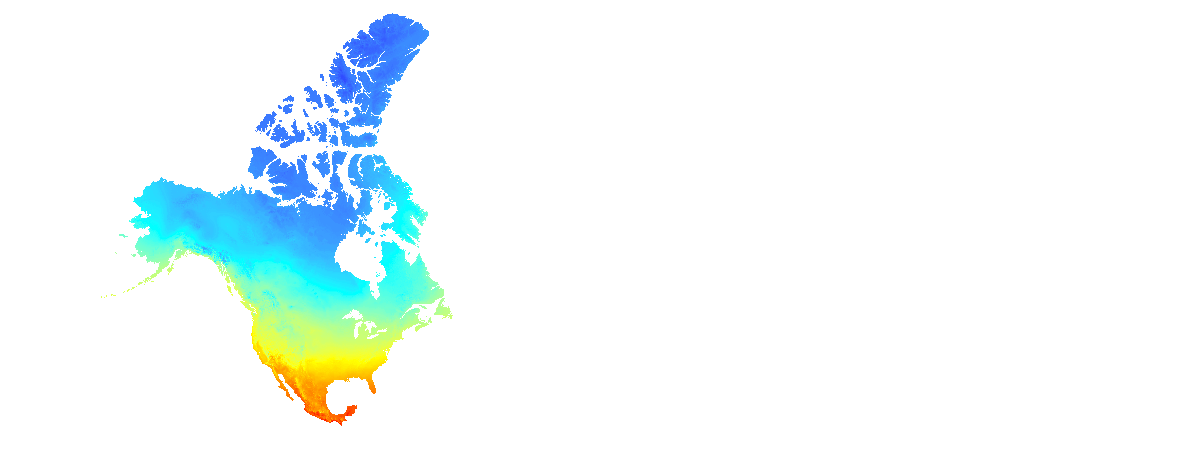

In [3]:
selected = img_lyr.filter_by(where="Name = 'daymet_v3_tmax_monavg_1980_na.nc4:tmax:0'")#, geometry=the_geom)
selected

# For each item in the mosaic there are 12 months of data

In [4]:
rasters_from_1980 = []
for i in range(0,12):
    nc_file = 'daymet_v3_tmax_monavg_1980_na.nc4:tmax:'+str(i)
    wc ="Name = '"+ nc_file + "'"
    selected = img_lyr.filter_by(where=wc)
    rasters_from_1980.append(selected)

In [5]:
month_list = ['January',
             'February',
             'March',
             'April',
             'May',
             'June',
             'July',
             'August',
             'September',
             'October',
             'November',
             'December']

# Playing though 12 months in 1980

In [6]:
import time
from IPython.display import display, clear_output

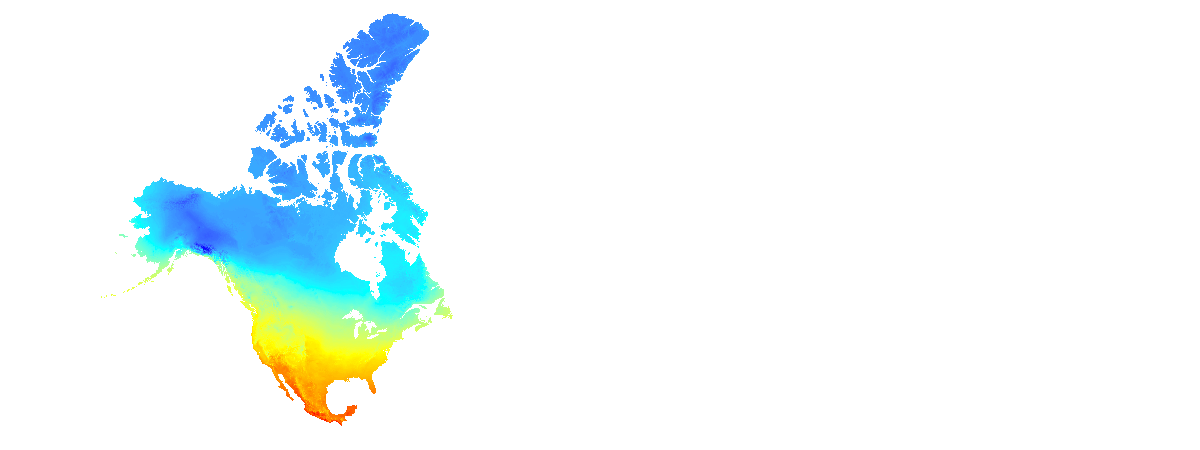

In [15]:
for idx,ras in enumerate(rasters_from_1980):
    if idx > 0:
        clear_output(wait=True)
    display(ras)
    #time.sleep(2)

# Or, looking at each month individually

# January 1980

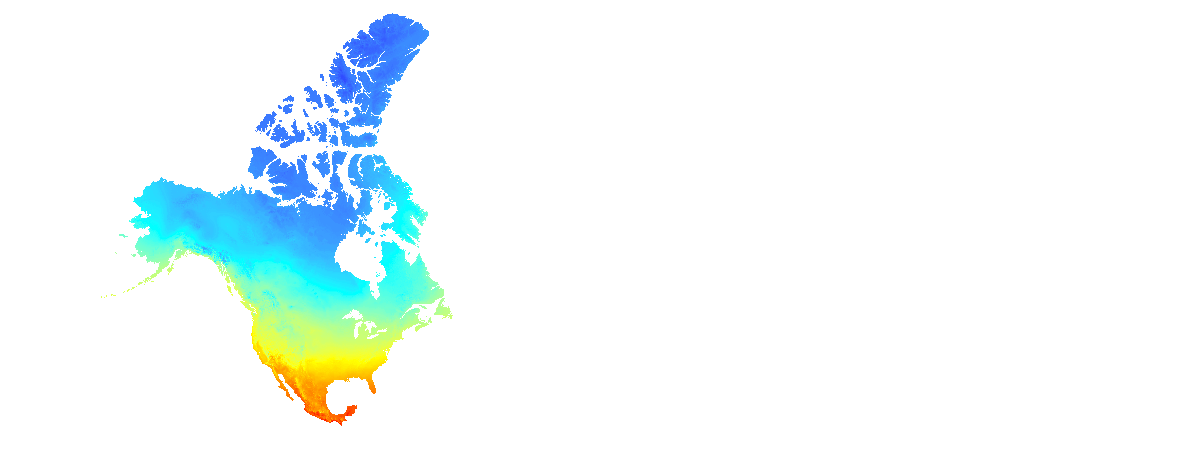

In [9]:
display(rasters_from_1980[0])

# February 1980

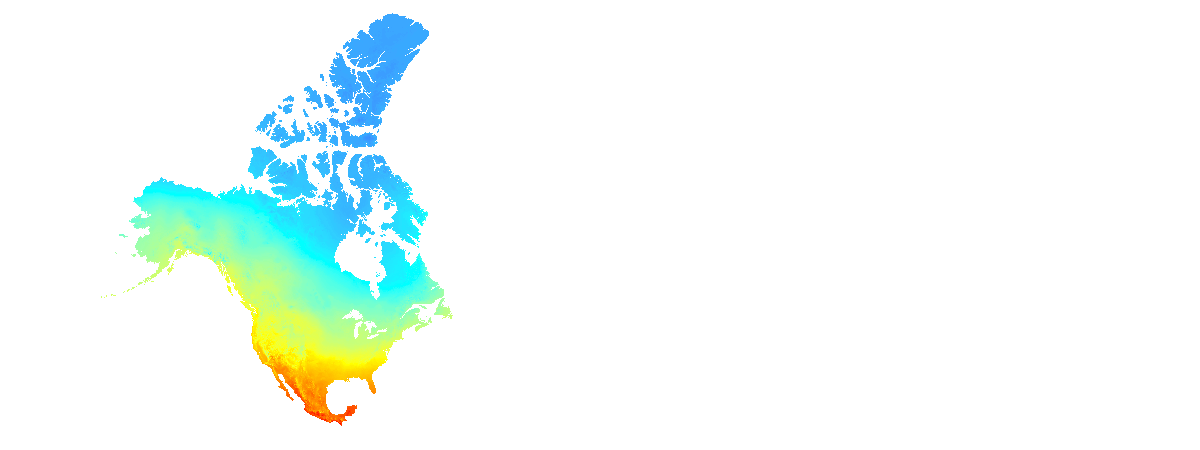

In [10]:
rasters_from_1980[1]

# March 1980

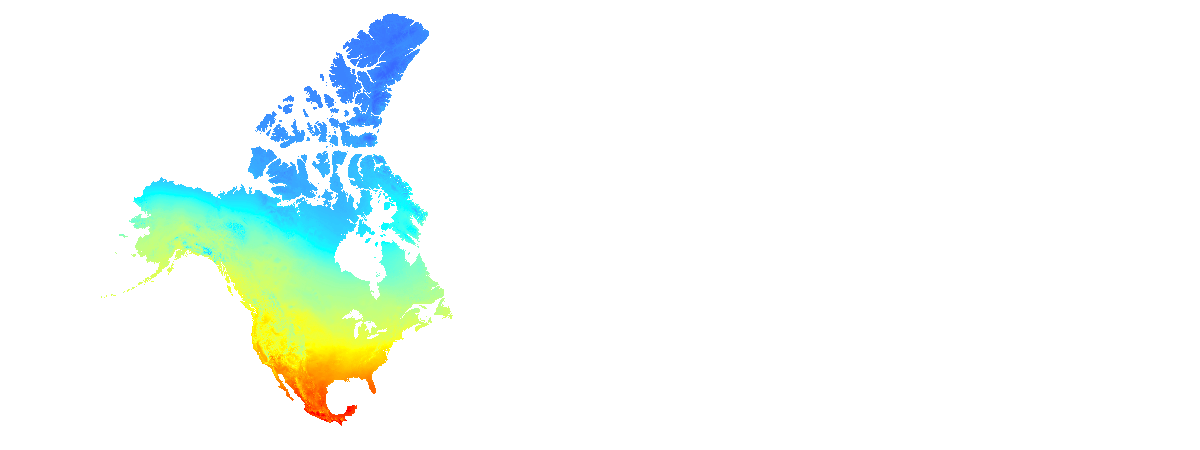

In [11]:
rasters_from_1980[2]

# April 1980

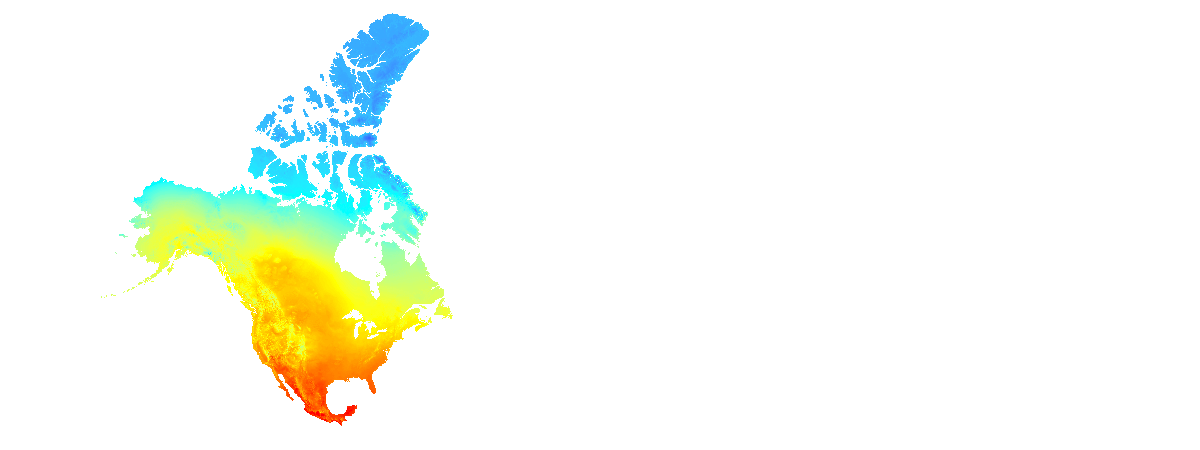

In [12]:
rasters_from_1980[3]

# May 1980

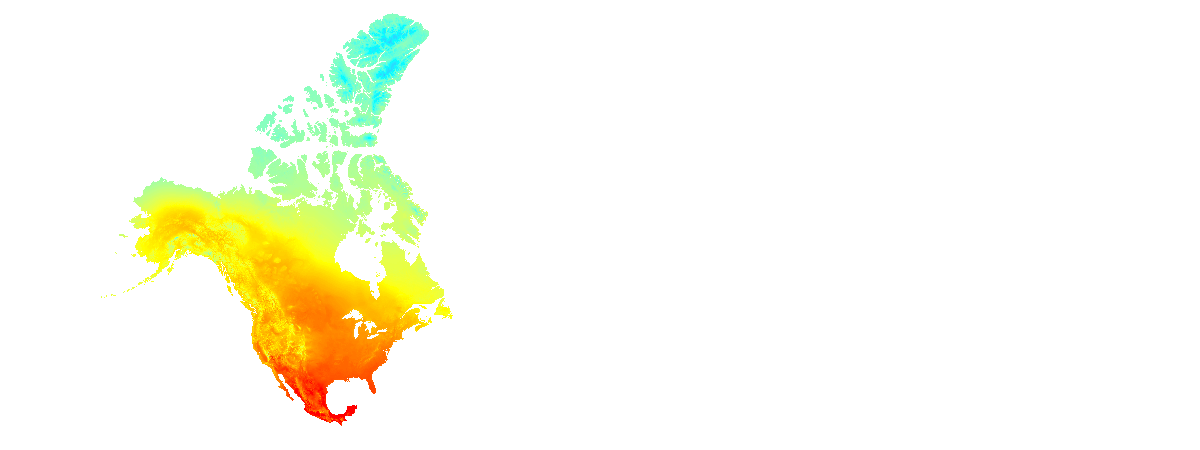

In [13]:
rasters_from_1980[4]

# June 1980

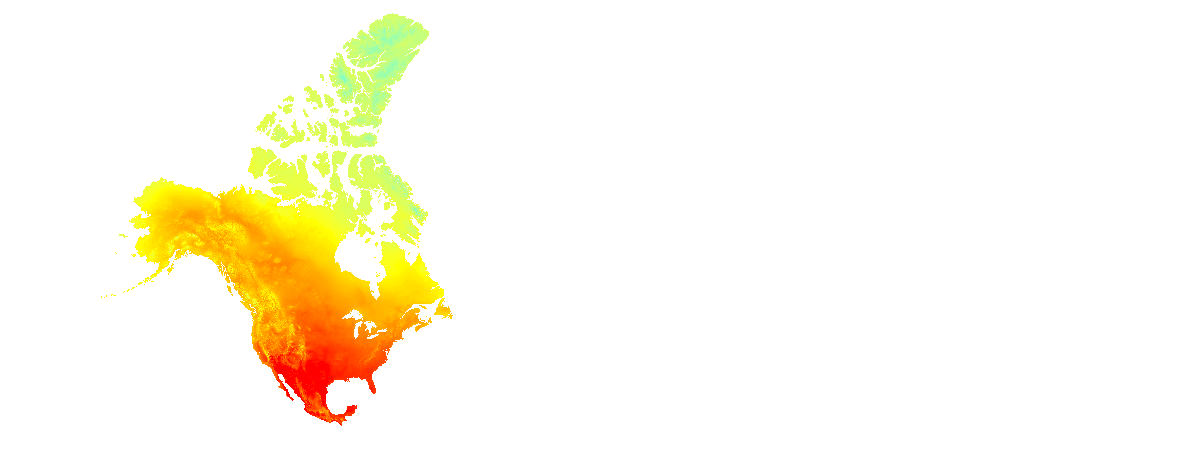

In [14]:
rasters_from_1980[5]

# July 1980

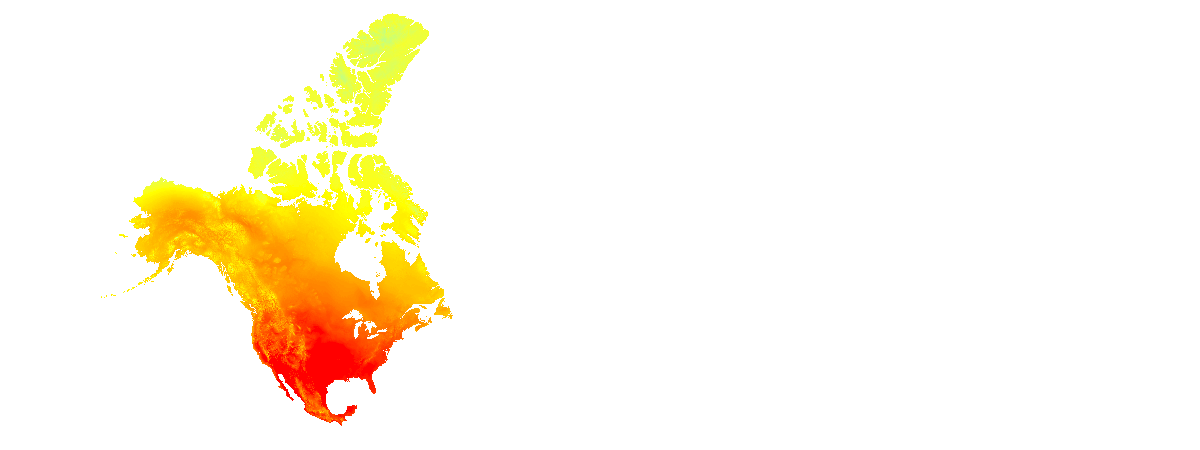

In [15]:
rasters_from_1980[6]

# August 1980

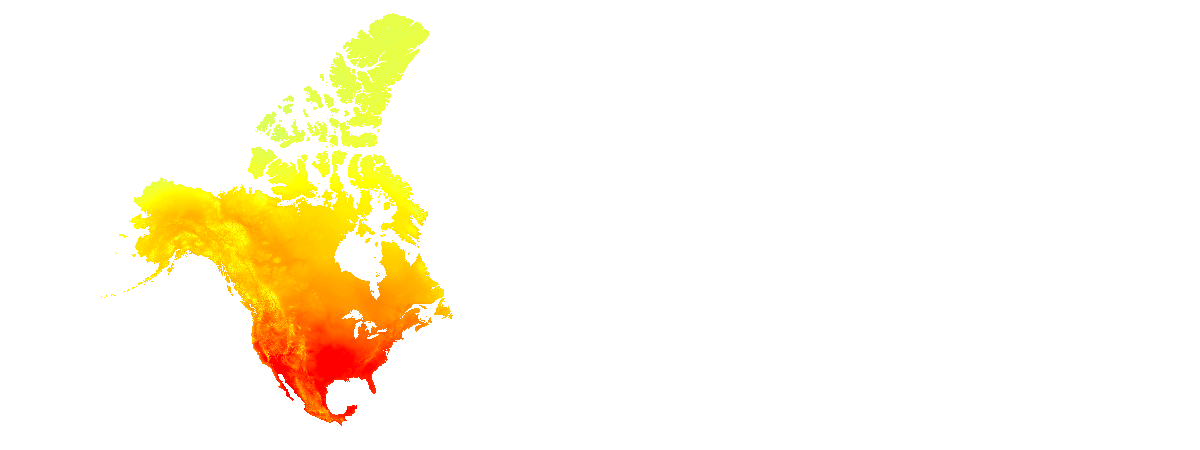

In [16]:
rasters_from_1980[7]

# September 1980

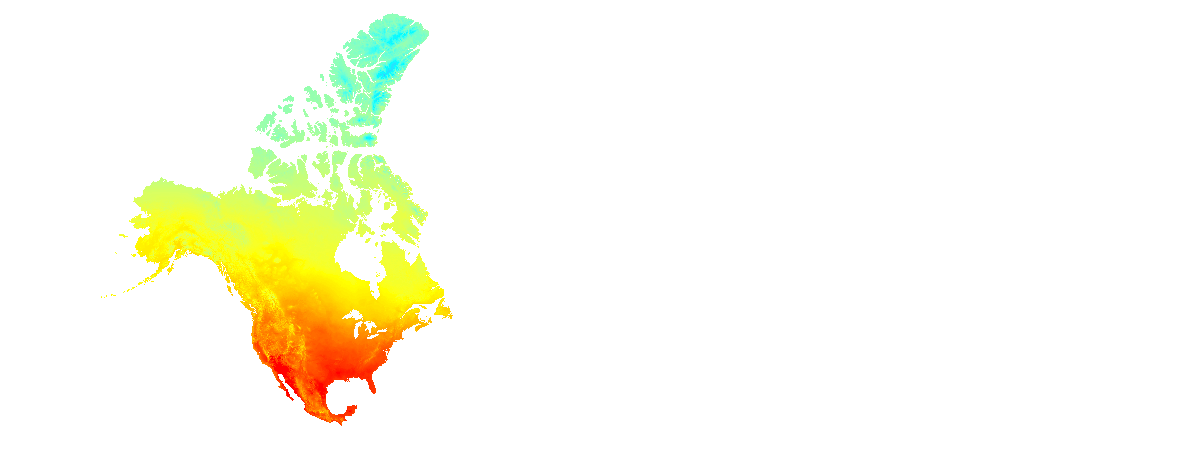

In [17]:
rasters_from_1980[8]

# October 1980

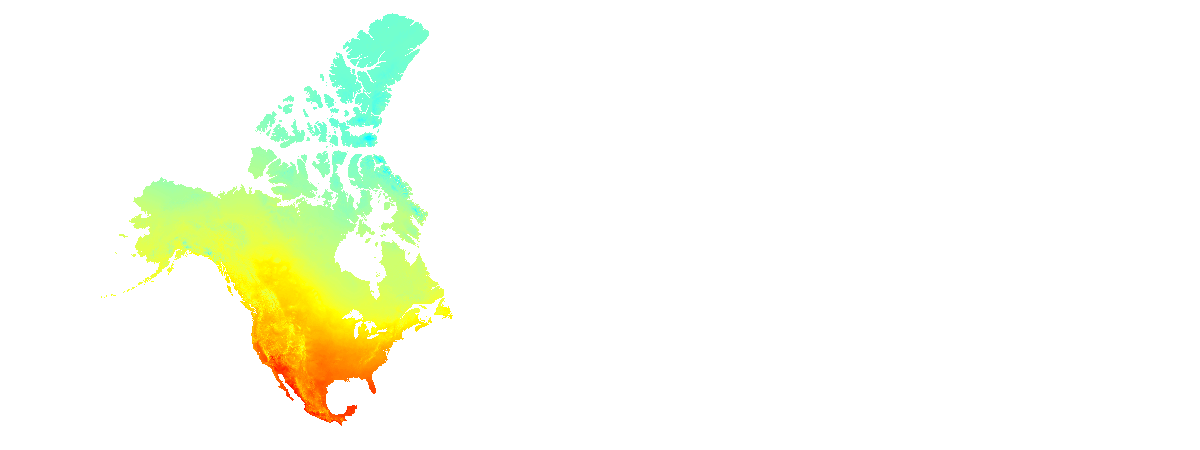

In [18]:
rasters_from_1980[9]

# November 1980

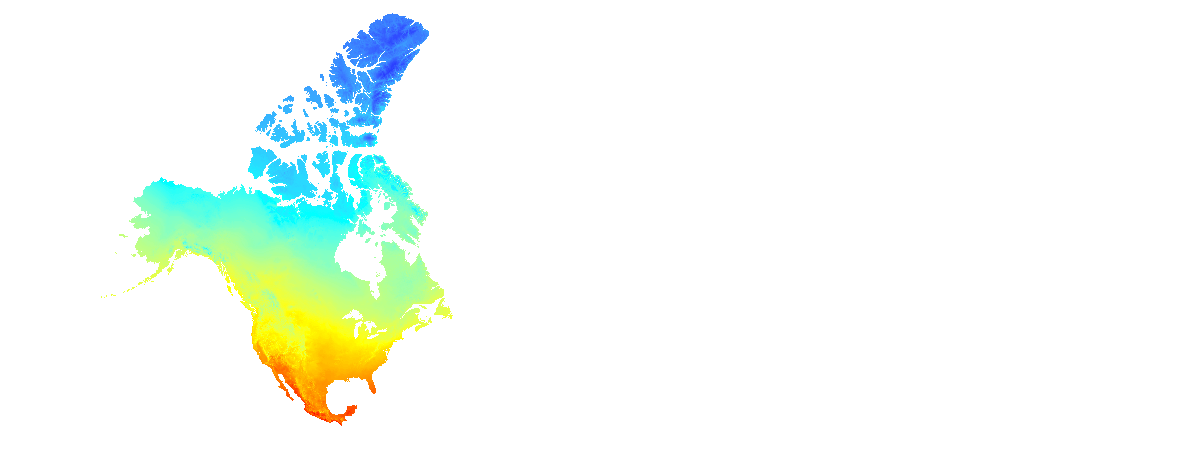

In [19]:
rasters_from_1980[10]

# December 1980

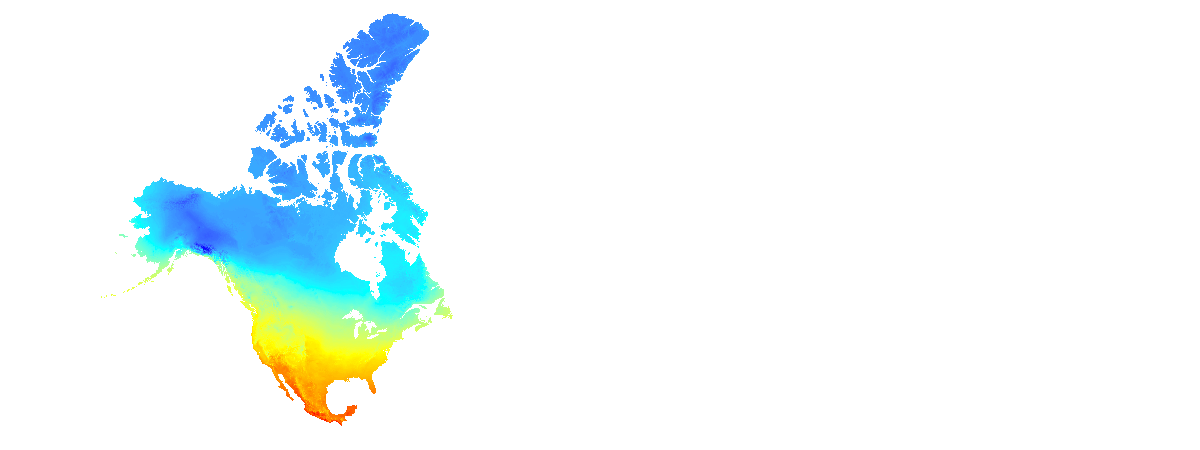

In [20]:
rasters_from_1980[11]

# Let's look at pixel values from St. Louis

In [8]:
from arcgis.geometry import Point

#STL Arch -> -10,039,400.195  4,668,061.643 
pixel_location = Point({"x" : -10039400.195, "y" : 4668061.643, "spatialReference" : {"wkid" : 102100}})

t = 316872000000

# At a single pixel at a single time

In [9]:
pixel = img_lyr.identify(geometry=pixel_location, time_extent=t)

In [10]:
pixel

{'objectId': 0,
 'name': 'Pixel',
 'value': '4.17742',
 'location': {'x': -10039400.195,
  'y': 4668061.643,
  'spatialReference': {'wkid': 102100, 'latestWkid': 3857}},
 'properties': {'Values': ['4.17742']},
 'catalogItems': {'objectIdFieldName': 'OBJECTID',
  'features': [{'attributes': {'OBJECTID': 169,
     'Name': 'daymet_v3_tmax_monavg_1980_na.nc4:tmax:0',
     'MinPS': 0,
     'MaxPS': 10000,
     'LowPS': 1000,
     'HighPS': 1000,
     'Category': 1,
     'Tag': 'tmax',
     'GroupName': '15887E6B79278569939F2014F66E05E3',
     'ProductName': '',
     'CenterX': -10287142.69305154,
     'CenterY': 10187890.995779932,
     'ZOrder': None,
     'Shape_Length': 74517659.8146055,
     'Shape_Area': 246276839187628.03,
     'Variable': 'tmax',
     'Dimensions': 'StdTime',
     'StdTime': 316872000000}}]},
 'catalogItemVisibilities': [1]}

# The 'value' for the pixel

In [11]:
pixel['value']

'4.17742'

# The table as a dataframe

In [12]:
im_sdf = img_lyr.query().df
im_sdf.head(3)

,Category,CenterX,CenterY,Dimensions,GroupName,HighPS,LowPS,MaxPS,MinPS,Name,OBJECTID,ProductName,Shape_Area,Shape_Length,StdTime,Tag,Variable,ZOrder,SHAPE
0,1,-1.028714e+07,1.018789e+07,StdTime,E839264B928A4254FAD63421C17C3832,1000,1000,10000,0,daymet_v3_tmax_monavg_1981_na.nc4:tmax:0,1,,2.462768e+14,7.451766e+07,348494400000,tmax,tmax,None,"{'rings': [[[20037507.067199998, 6721015.25720..."
1,1,-1.028714e+07,1.018789e+07,StdTime,426B16A749C89DEC45E5743A12BED259,1000,1000,10000,0,daymet_v3_tmax_monavg_1981_na.nc4:tmax:1,2,,2.462768e+14,7.451766e+07,351086400000,tmax,tmax,None,"{'rings': [[[20037507.067199998, 6721015.25720..."
2,1,-1.028714e+07,1.018789e+07,StdTime,F03D3DFF2F25DB4C31600A9D8108C335,1000,1000,10000,0,daymet_v3_tmax_monavg_1981_na.nc4:tmax:2,3,,2.462768e+14,7.451766e+07,353678400000,tmax,tmax,None,"{'rings': [[[20037507.067199998, 6721015.25720..."


# Let's create a list of image *times*

In [13]:
time = []
for idx,row in enumerate(im_sdf.iterrows()):
    #print(row[1]['StdTime'])
    time.append(float(row[1]['StdTime']))

# Let's get the temperature over St. Louis at every time-step

We can do this using ```img_lyr.identify(geometry=pixel_location, time_extent=t)```

In [26]:
from datetime import datetime

temperatures = []
for idx,row in enumerate(im_sdf.iterrows()):
    #print(row[1]['StdTime'])
    print(datetime.utcfromtimestamp(row[1]['StdTime']/1000))
    pixel_location = Point({"x" : -10039400.195, "y" : 4668061.643, "spatialReference" : {"wkid" : 102100}})
    t = row[1]['StdTime']
    pixel = img_lyr.identify(geometry=pixel_location, time_extent=t)
    print(float(pixel['value']))
    temperatures.append(float(pixel['value']))

1981-01-16 12:00:00
4.70968
1981-02-15 12:00:00
9.01724
1981-03-17 12:00:00
14.0806
1981-04-17 00:00:00
23.4833
1981-05-17 12:00:00
21.6129
1981-06-17 00:00:00
29.7333
1981-07-17 12:00:00
31.1452
1981-08-17 12:00:00
29.7419
1981-09-17 00:00:00
26.3
1981-10-17 12:00:00
18.9355
1981-11-17 00:00:00
14.6333
1981-12-17 00:00:00
4.23333
1982-01-16 12:00:00
0.403226
1982-02-15 12:00:00
4.53448
1982-03-17 12:00:00
13.8065
1982-04-17 00:00:00
17.1333
1982-05-17 12:00:00
27.3548
1982-06-17 00:00:00
26.7833
1982-07-17 12:00:00
31.5806
1982-08-17 12:00:00
29.129
1982-09-17 00:00:00
25.5833
1982-10-17 12:00:00
20.9194
1982-11-17 00:00:00
13.25
1982-12-17 00:00:00
9.53333
1991-01-16 12:00:00
1.08065
1991-02-15 12:00:00
10.4655
1991-03-17 12:00:00
15.3065
1991-04-17 00:00:00
21.2333
1991-05-17 12:00:00
27.3387
1991-06-17 00:00:00
31.0167
1991-07-17 12:00:00
31.8548
1991-08-17 12:00:00
31.4677
1991-09-17 00:00:00
26.8833
1991-10-17 12:00:00
21.2742
1991-11-17 00:00:00
9.58333
1991-12-17 00:00:00
8.316

20.7903
1994-11-17 00:00:00
15.7
1994-12-17 00:00:00
8.56667
1989-01-16 12:00:00
9.62903
1989-02-15 12:00:00
2.60345
1989-03-17 12:00:00
13.0968
1989-04-17 00:00:00
20.05
1989-05-17 12:00:00
23.7742
1989-06-17 00:00:00
28.5667
1989-07-17 12:00:00
30.7742
1989-08-17 12:00:00
30.4355
1989-09-17 00:00:00
24.7833
1989-10-17 12:00:00
22.0968
1989-11-17 00:00:00
14.55
1989-12-17 00:00:00
-0.0166667
1993-01-16 12:00:00
4.29032
1993-02-15 12:00:00
4.82759
1993-03-17 12:00:00
9.53226
1993-04-17 00:00:00
17.2333
1993-05-17 12:00:00
24.1774
1993-06-17 00:00:00
29.05
1993-07-17 12:00:00
31.8226
1993-08-17 12:00:00
31.1774
1993-09-17 00:00:00
23.5
1993-10-17 12:00:00
18.129
1993-11-17 00:00:00
10.6333
1993-12-17 00:00:00
6.06667
1996-01-16 12:00:00
3.27419
1996-02-15 12:00:00
8.62069
1996-03-16 12:00:00
9.64516
1996-04-16 00:00:00
17.8
1996-05-16 12:00:00
25.2258
1996-06-16 00:00:00
28.7
1996-07-16 12:00:00
29.8065
1996-08-16 12:00:00
30.6613
1996-09-16 00:00:00
25.1833
1996-10-16 12:00:00
20.8387


## Save results as pickle

In [27]:
import pickle

pixels_pickle = open("stl_temp_vals_2016.p","wb")
pickle.dump(temperatures, pixels_pickle)
pixels_pickle.close()

time_pickle = open("stl_time_vals_2016.p","wb")
pickle.dump(time, time_pickle)
time_pickle.close()

## Read Pickle

In [14]:
import pickle
from datetime import datetime

temperatures = pickle.load(open("stl_temp_vals_2016.p","rb"))
time = pickle.load(open("stl_time_vals_2016.p","rb"))

# Sorting the values

In [15]:
import numpy as np

sorted_t = np.sort(time)
sorted_t_idx = np.argsort(time)

sorted_datetimes = datetime.utcfromtimestamp(316872000000/1000)

sorted_datetimes = [datetime.utcfromtimestamp(dt/1000) for dt in sorted_t]

In [16]:
sorted_datetimes

[datetime.datetime(1980, 1, 16, 12, 0),
 datetime.datetime(1980, 2, 15, 12, 0),
 datetime.datetime(1980, 3, 16, 12, 0),
 datetime.datetime(1980, 4, 16, 0, 0),
 datetime.datetime(1980, 5, 16, 12, 0),
 datetime.datetime(1980, 6, 16, 0, 0),
 datetime.datetime(1980, 7, 16, 12, 0),
 datetime.datetime(1980, 8, 16, 12, 0),
 datetime.datetime(1980, 9, 16, 0, 0),
 datetime.datetime(1980, 10, 16, 12, 0),
 datetime.datetime(1980, 11, 16, 0, 0),
 datetime.datetime(1980, 12, 16, 0, 0),
 datetime.datetime(1981, 1, 16, 12, 0),
 datetime.datetime(1981, 2, 15, 12, 0),
 datetime.datetime(1981, 3, 17, 12, 0),
 datetime.datetime(1981, 4, 17, 0, 0),
 datetime.datetime(1981, 5, 17, 12, 0),
 datetime.datetime(1981, 6, 17, 0, 0),
 datetime.datetime(1981, 7, 17, 12, 0),
 datetime.datetime(1981, 8, 17, 12, 0),
 datetime.datetime(1981, 9, 17, 0, 0),
 datetime.datetime(1981, 10, 17, 12, 0),
 datetime.datetime(1981, 11, 17, 0, 0),
 datetime.datetime(1981, 12, 17, 0, 0),
 datetime.datetime(1982, 1, 16, 12, 0),
 dat

# Sorting the temperatures by time

In [17]:
sorted_temperatures = [temperatures[int(sorted_idx)] for sorted_idx in sorted_t_idx]
time = sorted_t
temperatures =  sorted_temperatures

# Ploting the periodic curve

# Plot parameters

In [18]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

Text(0,0.5,'Temperature (C)')

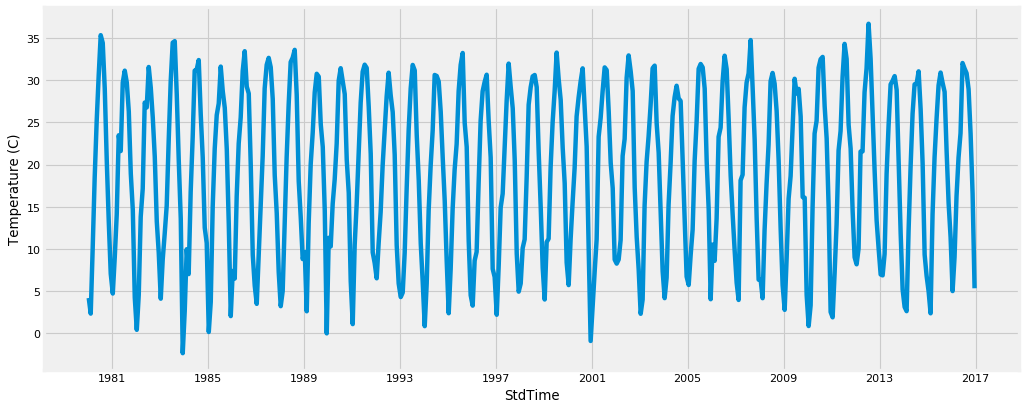

In [19]:
fig=plt.figure(figsize=(14, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(sorted_datetimes, temperatures,label='linear') #indicde 0 is max
plt.xlabel('StdTime')
plt.ylabel('Temperature (C)')

# Can we model temperature changes over time?

# Can we predict future seasonal temperature values?

# Using pandas and statsmodels

In [36]:
import statsmodels.api as sm
import pandas as pd

# Add temperatures to a dataframe and index by time

In [37]:
df = pd.DataFrame()
df['Date'] = sorted_datetimes
df['vals'] = sorted_temperatures
df = df.set_index('Date')
df.index = pd.to_datetime(df.index)

In [38]:
df.head(5)

,vals
Date,
1980-01-16 12:00:00,4.17742
1980-02-15 12:00:00,2.32759
1980-03-16 12:00:00,10.11290
1980-04-16 00:00:00,18.50000
1980-05-16 12:00:00,25.20970


# Seasonal Decomposition
- Seasonality and trend
- Automatically decompose time series data in Python using [sm.tsa](https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html)

<Figure size 1120x480 with 0 Axes>

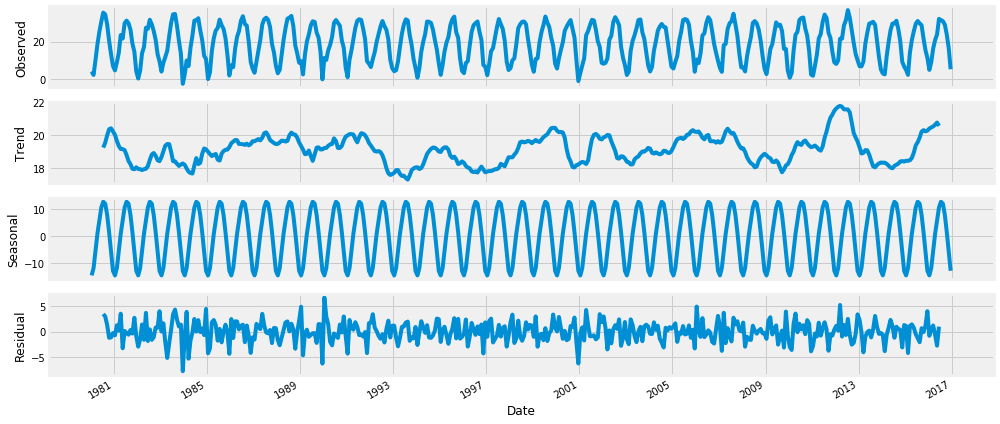

In [39]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 6

fig=plt.figure(figsize=(14, 6), dpi= 80, facecolor='w', edgecolor='k')
decomposition = sm.tsa.seasonal_decompose(df, freq=12)
fig = decomposition.plot()

# Predicting Future Temperatures with ARIMA
 - AutoRegressive Integrated Moving Average
 - ARIMA(p,d,q)(P,D,Q,S)
 - For example: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12)
 - (p,d,q) order of the model for the number of AR parameters, differences, and MA parameters
 - (P,D,Q,s) order of the seasonal component of the model for the AR parameters, differences, MA parameters, and periodicity
 - Auto ARIMA tests agaist varying values of p, d, q, P, D, and Q to find the best fit
 - [statsmodels.tsa.statespace.sarimax.SARIMA](https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html)

# Train on first 26 years, test on most recent 10

In [40]:
train =df.loc[:'2006-12-17 00:00:00']
test = df.loc['2007-01-16 12:00:00':]

In [41]:
#https://github.com/tgsmith61591/pmdarima/blob/master/pmdarima/arima/auto.py
#from pyramid.arima import auto_arima
#stepwise_model = auto_arima(df,order=(4,1,0),
#                           start_p=1, start_q=1,
#                           m=12, trace=True,
#                           error_action='ignore', 
#                           suppress_warnings=True,stepwise=True)
#remove:
# trace=True,

stepwise_model = auto_arima(df, start_p=1, start_q=1,
                           m=12,start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True,
                           max_p=3, max_q=3, 
                           stepwise=True)

#stepwise_model = auto_arima(df,start_p=1, start_q=1, max_p=3, max_q=3,m=12, start_P=0,seasonal=True,trace=True, 
#error_action='ignore', suppress_warnings=True,stepwise=True)
#print(stepwise_model.aic())

# Run the model using Pyramid
Pyramid is a no-nonsense statistical Python library with a solitary objective: bring R's auto.arima functionality to Python. Pyramid operates by wrapping statsmodels.tsa.ARIMA and statsmodels.tsa.statespace.SARIMAX into one estimator class and creating a more user-friendly estimator interface for programmers familiar with scikit-learn.

In [43]:
from pyramid.arima import auto_arima
stepwise_model = auto_arima(df, start_p=1, start_q=1,
                           m=12,start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True,
                           max_p=3, max_q=3, 
                           stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1958.721, BIC=1979.052, Fit time=1.776 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=2456.608, BIC=2464.740, Fit time=0.035 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=2261.171, BIC=2277.435, Fit time=0.438 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1967.299, BIC=1983.564, Fit time=1.045 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1959.570, BIC=1983.966, Fit time=2.246 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=2231.161, BIC=2247.426, Fit time=0.713 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=1959.328, BIC=1983.725, Fit time=6.358 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=1962.661, BIC=1991.123, Fit time=8.381 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1959.729, BIC=1984.126, Fit time=2.415 seconds
Fit ARIMA: order=(1, 1, 0) s

# Fit the model to the training data

In [43]:
stepwise_model.fit(train)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 1, 1),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(0, 1, 1, 12), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='c')

# Predict future values

In [44]:
future_forecast = stepwise_model.predict(120)
print(future_forecast)

[ 5.55628977  8.31078493 13.80045128 20.47112628 25.44533914 30.0850118
 32.48933927 31.59731695 27.54685804 21.13826592 13.74157143  6.79073305
  5.3037953   8.36420204 13.88770183 20.56241122 25.53739479 30.17748069
 32.58218224 31.69052973 27.64044016 21.23221731 13.8358921   6.88542299
  5.39885452  8.45963053 13.9834996  20.65857827 25.63393111 30.27438628
 32.67945711 31.78817388 27.73845358 21.33060001 13.93464408  6.98454424
  5.49834505  8.55949033 14.08372868 20.75917662 25.73489874 30.37572319
 32.78116329 31.89024933 27.84089831 21.43341401 14.03782736  7.0880968
  5.60226688  8.66378144 14.18838906 20.86420628 25.84029767 30.4814914
 32.88730078 31.99675609 27.94777434 21.54065932 14.14544194  7.19608066
  5.71062002  8.77250385 14.29748075 20.97366724 25.95012791 30.59169091
 32.99786957 32.10769416 28.05908168 21.65233594 14.25748784  7.30849583
  5.82340446  8.88565757 14.41100374 21.08755951 26.06438945 30.70632173
 33.11286966 32.22306353 28.17482033 21.76844386 14.37

# Concatenate data frames for easy plotting

In [45]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])
comparison_df = pd.concat([test,future_forecast],axis=1)

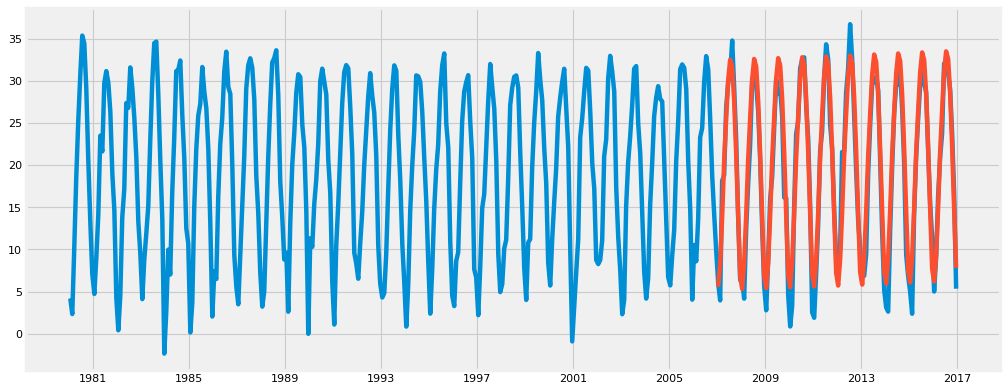

In [47]:
fig=plt.figure(figsize=(14, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(df['vals'])
plt.plot(comparison_df['Prediction'])

https://www.analyticsvidhya.com/blog/2018/08/auto-arima-time-series-modeling-python-r/

# Is there a trend in the temperature values?
- Yes, the July predictions goes up bt 1 degree C over 10 years

In [139]:
comparison_df.iloc[6::12, :]

,vals,Prediction
Date,,
2007-07-17 12:00:00,30.8226,32.489339
2008-07-16 12:00:00,30.8710,32.582182
2009-07-17 12:00:00,28.4355,32.679457
2010-07-17 12:00:00,32.5000,32.781163
2011-07-17 12:00:00,34.3226,32.887301
2012-07-16 12:00:00,36.7097,32.997870
2013-07-17 12:00:00,29.9516,33.112870
2014-07-17 12:00:00,29.5806,33.232301
2015-07-17 12:00:00,30.9194,33.356164


# Is there a trend at other locations?

In [3]:
la = [-118.2437,34.0522]
sf = [-122.4194,37.7749]
chicago = [-87.6298,41.8781]
houston = [-95.3698,29.7604]
atlanta = [-84.3880,33.7490] 
philadelphia = [-75.1652,39.9526]
boston = [-71.0589,42.3601]
st_louis = [-90.1994, 38.6270]
lat_lon = [la, sf, chicago, houston, atlanta, philadelphia, boston, st_louis]
city_list = ["los_angeles", "san_francisco", "chicago", "houston", "atlanta", "philadelphia", "boston", "st_louis"]

# Plotting the cities on a map

In [4]:
from arcgis.geometry import Geometry, Point

locations = []
for point in lat_lon:
    locations.append(Point(point))

In [5]:
symbol = {"color":[0,0,128,128],
                    "size":18,
                    "angle":0,
                    "xoffset":0,
                    "yoffset":0,
                    "type":"esriSMS",
                    "style":
                    "esriSMSCircle",
                    "outline":
                        {"color":[0,0,128,255],
                         "width":1,
                         "type":"esriSLS",
                         "style":"esriSLSSolid"}
}

In [6]:
world_map = gis.map('USA')
world_map

MapView(layout=Layout(height='400px', width='100%'))

In [7]:
for l in locations:
    world_map.draw(l, symbol=symbol)

#  I ran this anaysis for each city

In [79]:
temp_by_city = {}
for i,l in enumerate(locations):
    print(city_list[i])
    temp_by_city[city_list[i]] = {}
    temp_list = []
    for t in sorted_t:
        print(t)
        pixel = img_lyr.identify(geometry=l, time_extent=t)
        try:
            pix = float(pixel['value'])
            temp_list.append(pix)
            temp_by_city[city_list[i]]=temp_list
        except:
            print("ERROR")

los_angeles
316872000000.0
319464000000.0
322056000000.0
324691200000.0
327326400000.0
329961600000.0
332596800000.0
335275200000.0
337910400000.0
340545600000.0
343180800000.0
345772800000.0
348494400000.0
351086400000.0
353678400000.0
356313600000.0
358948800000.0
361584000000.0
364219200000.0
366897600000.0
369532800000.0
372168000000.0
374803200000.0
377395200000.0
380030400000.0
382622400000.0
385214400000.0
387849600000.0
390484800000.0
393120000000.0
395755200000.0
398433600000.0
401068800000.0
403704000000.0
406339200000.0
408931200000.0
411566400000.0
414158400000.0
416750400000.0
419385600000.0
422020800000.0
424656000000.0
427291200000.0
429969600000.0
432604800000.0
435240000000.0
437875200000.0
440467200000.0
443102400000.0
445694400000.0
448286400000.0
450921600000.0
453556800000.0
456192000000.0
458827200000.0
461505600000.0
464140800000.0
466776000000.0
469411200000.0
472003200000.0
474724800000.0
477316800000.0
479908800000.0
482544000000.0
485179200000.0
487814400000.

550886400000.0
553521600000.0
556200000000.0
558835200000.0
561470400000.0
564105600000.0
566697600000.0
569332800000.0
571924800000.0
574516800000.0
577152000000.0
579787200000.0
582422400000.0
585057600000.0
587736000000.0
590371200000.0
593006400000.0
595641600000.0
598233600000.0
600955200000.0
603547200000.0
606139200000.0
608774400000.0
611409600000.0
614044800000.0
616680000000.0
619358400000.0
621993600000.0
624628800000.0
627264000000.0
629856000000.0
632491200000.0
635083200000.0
637675200000.0
640310400000.0
642945600000.0
645580800000.0
648216000000.0
650894400000.0
653529600000.0
656164800000.0
658800000000.0
661392000000.0
664027200000.0
666619200000.0
669211200000.0
671846400000.0
674481600000.0
677116800000.0
679752000000.0
682430400000.0
685065600000.0
687700800000.0
690336000000.0
692928000000.0
695563200000.0
698155200000.0
700747200000.0
703382400000.0
706017600000.0
708652800000.0
711288000000.0
713966400000.0
716601600000.0
719236800000.0
721872000000.0
7244640000

787622400000.0
790257600000.0
792849600000.0
795441600000.0
798076800000.0
800712000000.0
803347200000.0
805982400000.0
808660800000.0
811296000000.0
813931200000.0
816566400000.0
819158400000.0
821793600000.0
824385600000.0
826977600000.0
829612800000.0
832248000000.0
834883200000.0
837518400000.0
840196800000.0
842832000000.0
845467200000.0
848102400000.0
850694400000.0
853416000000.0
856008000000.0
858600000000.0
861235200000.0
863870400000.0
866505600000.0
869140800000.0
871819200000.0
874454400000.0
877089600000.0
879724800000.0
882316800000.0
884952000000.0
887544000000.0
890136000000.0
892771200000.0
895406400000.0
898041600000.0
900676800000.0
903355200000.0
905990400000.0
908625600000.0
911260800000.0
913852800000.0
916488000000.0
919080000000.0
921672000000.0
924307200000.0
926942400000.0
929577600000.0
932212800000.0
934891200000.0
937526400000.0
940161600000.0
942796800000.0
945388800000.0
948024000000.0
950616000000.0
953208000000.0
955843200000.0
958478400000.0
9611136000

1021636800000.0
1024272000000.0
1026907200000.0
1029585600000.0
1032220800000.0
1034856000000.0
1037491200000.0
1040083200000.0
1042718400000.0
1045310400000.0
1047902400000.0
1050537600000.0
1053172800000.0
1055808000000.0
1058443200000.0
1061121600000.0
1063756800000.0
1066392000000.0
1069027200000.0
1071619200000.0
1074254400000.0
1076846400000.0
1079438400000.0
1082073600000.0
1084708800000.0
1087344000000.0
1089979200000.0
1092657600000.0
1095292800000.0
1097928000000.0
1100563200000.0
1103155200000.0
1105876800000.0
1108468800000.0
1111060800000.0
1113696000000.0
1116331200000.0
1118966400000.0
1121601600000.0
1124280000000.0
1126915200000.0
1129550400000.0
1132185600000.0
1134777600000.0
1137412800000.0
1140004800000.0
1142596800000.0
1145232000000.0
1147867200000.0
1150502400000.0
1153137600000.0
1155816000000.0
1158451200000.0
1161086400000.0
1163721600000.0
1166313600000.0
1168948800000.0
1171540800000.0
1174132800000.0
1176768000000.0
1179403200000.0
1182038400000.0
11846736

1242561600000.0
1245196800000.0
1247832000000.0
1250510400000.0
1253145600000.0
1255780800000.0
1258416000000.0
1261008000000.0
1263643200000.0
1266235200000.0
1268827200000.0
1271462400000.0
1274097600000.0
1276732800000.0
1279368000000.0
1282046400000.0
1284681600000.0
1287316800000.0
1289952000000.0
1292544000000.0
1295179200000.0
1297771200000.0
1300363200000.0
1302998400000.0
1305633600000.0
1308268800000.0
1310904000000.0
1313582400000.0
1316217600000.0
1318852800000.0
1321488000000.0
1324080000000.0
1326715200000.0
1329307200000.0
1331899200000.0
1334534400000.0
1337169600000.0
1339804800000.0
1342440000000.0
1345118400000.0
1347753600000.0
1350388800000.0
1353024000000.0
1355616000000.0
1358337600000.0
1360929600000.0
1363521600000.0
1366156800000.0
1368792000000.0
1371427200000.0
1374062400000.0
1376740800000.0
1379376000000.0
1382011200000.0
1384646400000.0
1387238400000.0
1389873600000.0
1392465600000.0
1395057600000.0
1397692800000.0
1400328000000.0
1402963200000.0
14055984

1463400000000.0
1466035200000.0
1468670400000.0
1471348800000.0
1473984000000.0
1476619200000.0
1479254400000.0
1481846400000.0
boston
316872000000.0
319464000000.0
322056000000.0
324691200000.0
327326400000.0
329961600000.0
332596800000.0
335275200000.0
337910400000.0
340545600000.0
343180800000.0
345772800000.0
348494400000.0
351086400000.0
353678400000.0
356313600000.0
358948800000.0
361584000000.0
364219200000.0
366897600000.0
369532800000.0
372168000000.0
374803200000.0
377395200000.0
380030400000.0
382622400000.0
385214400000.0
387849600000.0
390484800000.0
393120000000.0
395755200000.0
398433600000.0
401068800000.0
403704000000.0
406339200000.0
408931200000.0
411566400000.0
414158400000.0
416750400000.0
419385600000.0
422020800000.0
424656000000.0
427291200000.0
429969600000.0
432604800000.0
435240000000.0
437875200000.0
440467200000.0
443102400000.0
445694400000.0
448286400000.0
450921600000.0
453556800000.0
456192000000.0
458827200000.0
461505600000.0
464140800000.0
4667760000

529934400000.0
532569600000.0
535161600000.0
537796800000.0
540388800000.0
542980800000.0
545616000000.0
548251200000.0
550886400000.0
553521600000.0
556200000000.0
558835200000.0
561470400000.0
564105600000.0
566697600000.0
569332800000.0
571924800000.0
574516800000.0
577152000000.0
579787200000.0
582422400000.0
585057600000.0
587736000000.0
590371200000.0
593006400000.0
595641600000.0
598233600000.0
600955200000.0
603547200000.0
606139200000.0
608774400000.0
611409600000.0
614044800000.0
616680000000.0
619358400000.0
621993600000.0
624628800000.0
627264000000.0
629856000000.0
632491200000.0
635083200000.0
637675200000.0
640310400000.0
642945600000.0
645580800000.0
648216000000.0
650894400000.0
653529600000.0
656164800000.0
658800000000.0
661392000000.0
664027200000.0
666619200000.0
669211200000.0
671846400000.0
674481600000.0
677116800000.0
679752000000.0
682430400000.0
685065600000.0
687700800000.0
690336000000.0
692928000000.0
695563200000.0
698155200000.0
700747200000.0
7033824000

In [83]:
import pickle

pixels_pickle = open("city_temp_vals_2016.p","wb")
pickle.dump(temp_by_city, pixels_pickle)
pixels_pickle.close()

In [54]:
temp_by_city = pickle.load(open("city_temp_vals_2016.p","rb"))

# Create dataframe and set index to be time

In [55]:
city_df = pd.DataFrame(temp_by_city)
city_df['time'] = sorted_datetimes
city_df = city_df.set_index('time')
city_df.index = pd.to_datetime(city_df.index)
city_df.head()

,los_angeles,san_francisco,chicago,houston,atlanta,philadelphia,boston,st_louis
time,,,,,,,,
1980-01-16 12:00:00,19.8065,14.3710,-0.387097,17.7903,10.9355,4.17742,2.48387,4.16129
1980-02-15 12:00:00,22.3448,16.9828,-1.051720,17.3966,10.8621,3.75862,1.98276,2.27586
1980-03-16 12:00:00,21.1613,17.5000,5.048390,21.5161,16.1290,9.56452,7.41935,10.00000
1980-04-16 00:00:00,24.0167,18.6667,13.050000,24.9167,22.4167,18.21670,14.08330,18.50000
1980-05-16 12:00:00,21.8387,18.3871,21.709700,29.7097,26.2903,24.58060,20.17740,25.20970


# Temperature profiles per city

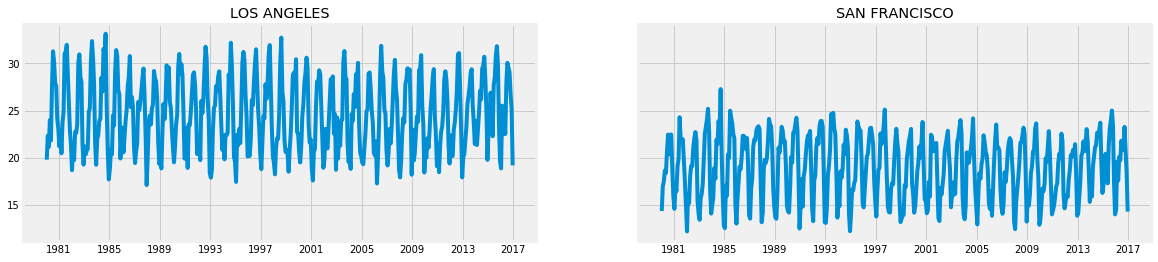

In [88]:
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row')
fig.set_figheight(4)
fig.set_figwidth(18)

for j in range(2):
    ax[j].plot(city_df[city_list[j]])
    plt.setp(ax[j],title=city_list[j].replace('_', ' ').upper())

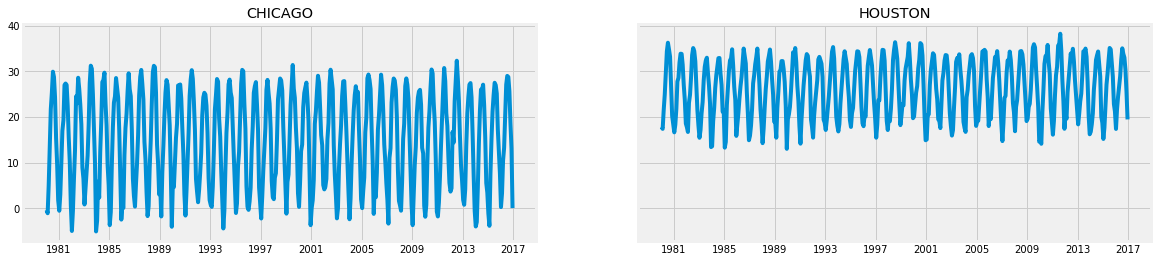

In [89]:
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row')
fig.set_figheight(4)
fig.set_figwidth(18)

for j in range(2):
    ax[j].plot(city_df[city_list[j+2]])
    plt.setp(ax[j],title=city_list[j+2].replace('_', ' ').upper())

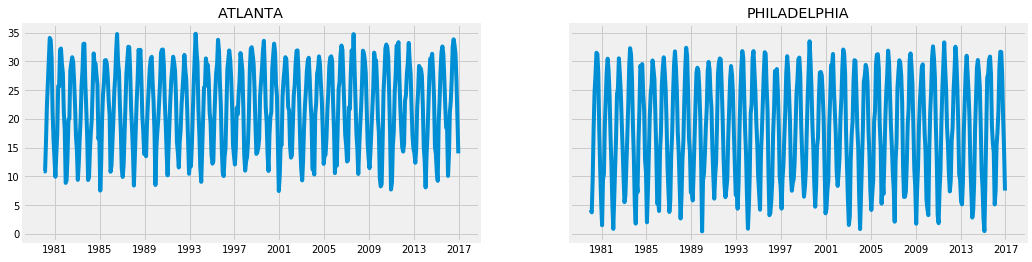

In [90]:
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row')
fig.set_figheight(4)
fig.set_figwidth(16)

for j in range(2):
    ax[j].plot(city_df[city_list[j+4]])
    plt.setp(ax[j],title=city_list[j+4].replace('_', ' ').upper())

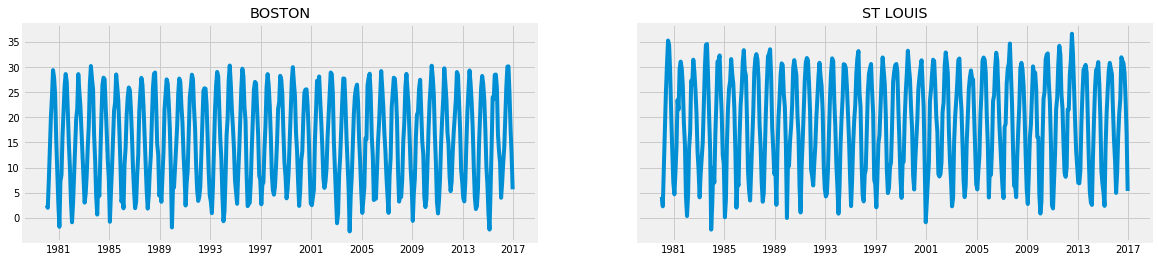

In [91]:
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row')
fig.set_figheight(4)
fig.set_figwidth(18)

for j in range(2):
    ax[j].plot(city_df[city_list[j+6]])
    plt.setp(ax[j],title=city_list[j+6].replace('_', ' ').upper())

<Figure size 1152x1152 with 0 Axes>

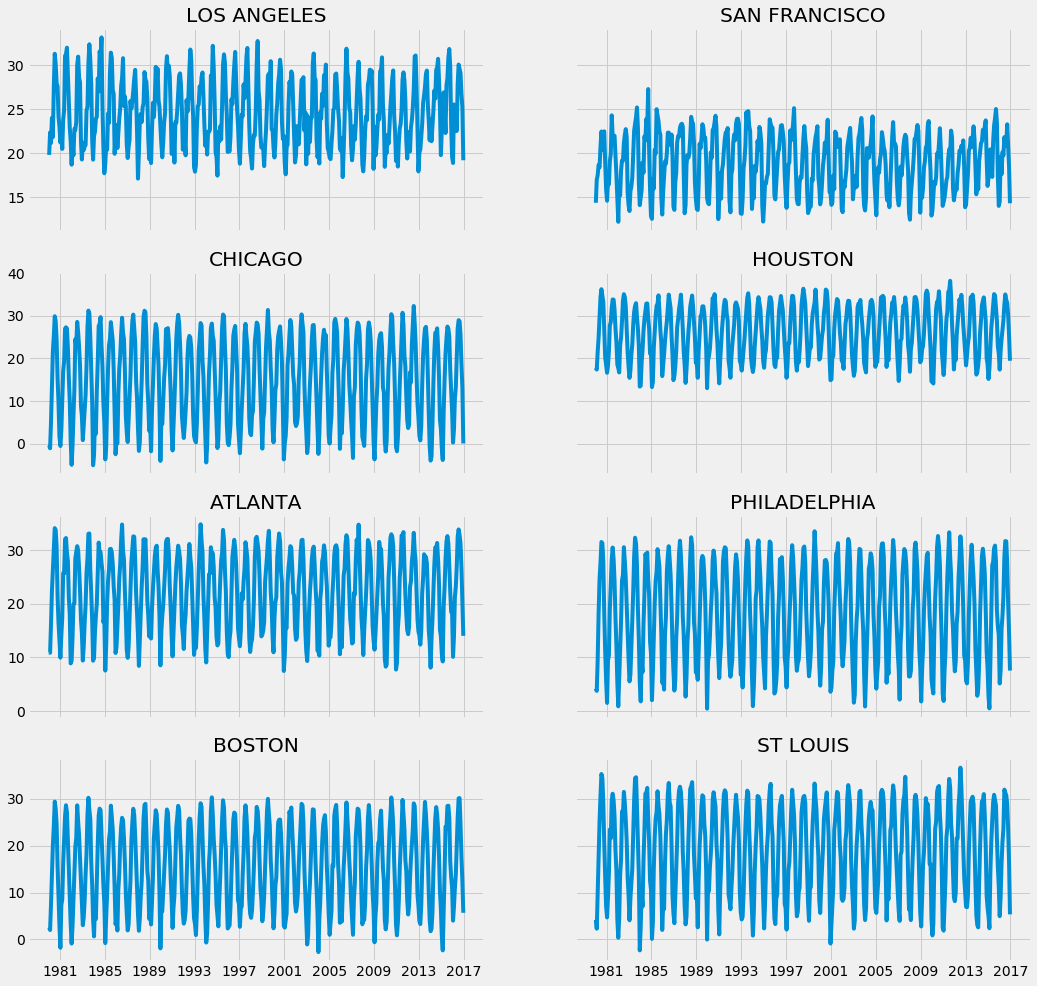

In [148]:
plt.figure(figsize=(12, 12), dpi= 96, facecolor='w', edgecolor='k')

fig, ax = plt.subplots(4, 2, sharex='col', sharey='row')
fig.set_figheight(16)
fig.set_figwidth(16)

counter = 0
for i in range(4):
    for j in range(2):
        ax[i, j].plot(city_df[city_list[counter]])
        plt.setp(ax[i, j],title=city_list[counter].replace('_', ' ').upper())
        counter = counter+1

In [69]:
train = city_df.loc[:'2006-12-17 00:00:00']
test = city_df.loc['2007-01-16 12:00:00':]

In [150]:
from pyramid.arima import auto_arima
model = {}
future_forecast = {}
for city in city_list:
    print(city)
    model[city] = auto_arima(city_df[city], start_p=1, start_q=1,
                           m=12,start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True)#, n_jobs=8)
    print("Fitting...")
    model[city].fit(train[city])
    print("Forecasting...")
    future_forecast[city] = model[city].predict(120)

los_angeles
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1673.425, BIC=1693.756, Fit time=2.008 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=2120.333, BIC=2128.466, Fit time=0.035 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1947.525, BIC=1963.790, Fit time=0.388 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1679.156, BIC=1695.420, Fit time=1.068 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1674.496, BIC=1698.892, Fit time=2.424 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=1894.668, BIC=1910.932, Fit time=0.721 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=1674.456, BIC=1698.852, Fit time=9.498 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=1676.143, BIC=1704.606, Fit time=5.950 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) s

Fit ARIMA: order=(3, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1580.349, BIC=1608.812, Fit time=3.009 seconds
Total fit time: 53.191 seconds
Fitting...
Forecasting...
atlanta
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1751.300, BIC=1771.630, Fit time=2.220 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=2246.941, BIC=2255.073, Fit time=0.034 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=2008.922, BIC=2025.186, Fit time=0.429 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1760.099, BIC=1776.364, Fit time=2.039 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1749.605, BIC=1774.002, Fit time=2.796 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=1904.007, BIC=1924.337, Fit time=3.201 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=1755.302, BIC=1783.765, Fit time=8.106 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=2037.154, 

In [73]:
future_forecast

,Prediction
Date,
2007-01-16 12:00:00,5.556290
2007-02-15 12:00:00,8.310785
2007-03-17 12:00:00,13.800451
2007-04-17 00:00:00,20.471126
2007-05-17 12:00:00,25.445339
2007-06-17 00:00:00,30.085012
2007-07-17 12:00:00,32.489339
2007-08-17 12:00:00,31.597317
2007-09-17 00:00:00,27.546858


In [152]:
import pickle

pixels_pickle = open("city_forecast_temp_vals_2016.p","wb")
pickle.dump(future_forecast, pixels_pickle)
pixels_pickle.close()

In [74]:
import pickle

future_forecast = pickle.load(open("city_forecast_temp_vals_2016.p","rb"))

# Applying Auto ARIMA to all cities

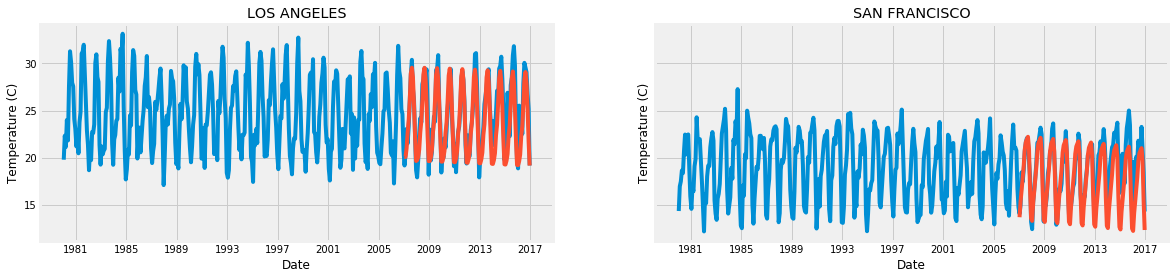

In [92]:
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row')
fig.set_figheight(4)
fig.set_figwidth(18)

for j in range(2):
    ax[j].plot(city_df[city_list[j]])
    ax[j].plot(sorted_datetimes[444-120:], future_forecast[city_list[j]])
    plt.setp(ax[j],title=city_list[j].replace('_', ' ').upper())
    plt.setp(ax[j], xlabel = "Date", ylabel = "Temperature (C)")

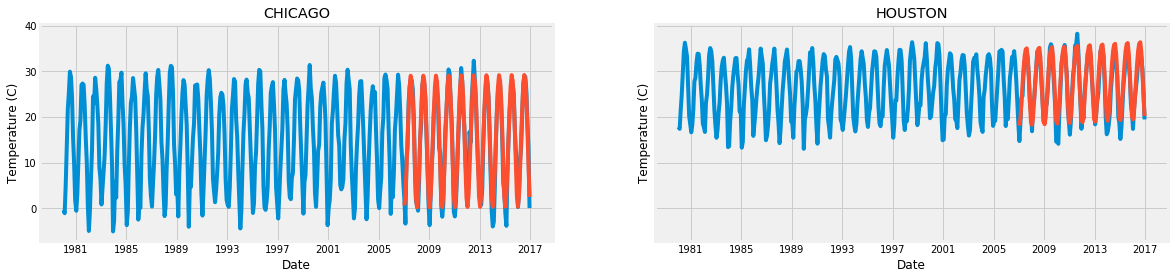

In [93]:
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row')
fig.set_figheight(4)
fig.set_figwidth(18)

for j in range(2):
    ax[j].plot(city_df[city_list[j+2]])
    ax[j].plot(sorted_datetimes[444-120:], future_forecast[city_list[j+2]])
    plt.setp(ax[j],title=city_list[j+2].replace('_', ' ').upper())
    plt.setp(ax[j], xlabel = "Date", ylabel = "Temperature (C)")

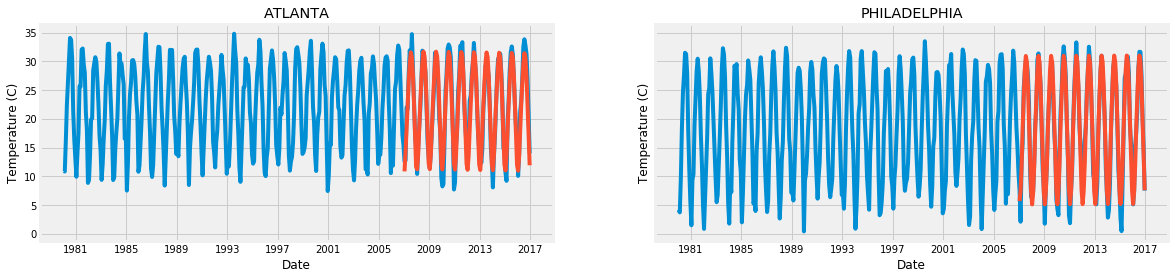

In [94]:
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row')
fig.set_figheight(4)
fig.set_figwidth(18)

for j in range(2):
    ax[j].plot(city_df[city_list[j+4]])
    ax[j].plot(sorted_datetimes[444-120:], future_forecast[city_list[j+4]])
    plt.setp(ax[j],title=city_list[j+4].replace('_', ' ').upper())
    plt.setp(ax[j], xlabel = "Date", ylabel = "Temperature (C)")

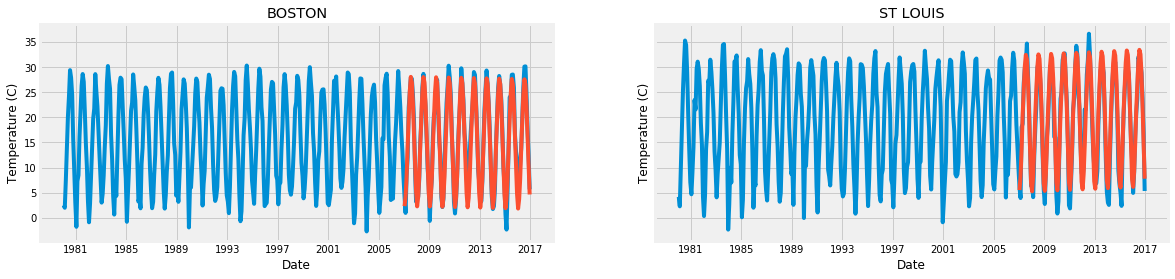

In [95]:
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row')
fig.set_figheight(4)
fig.set_figwidth(18)

for j in range(2):
    ax[j].plot(city_df[city_list[j+6]])
    ax[j].plot(sorted_datetimes[444-120:], future_forecast[city_list[j+6]])
    plt.setp(ax[j],title=city_list[j+6].replace('_', ' ').upper())
    plt.setp(ax[j], xlabel = "Date", ylabel = "Temperature (C)")

<Figure size 1152x1152 with 0 Axes>

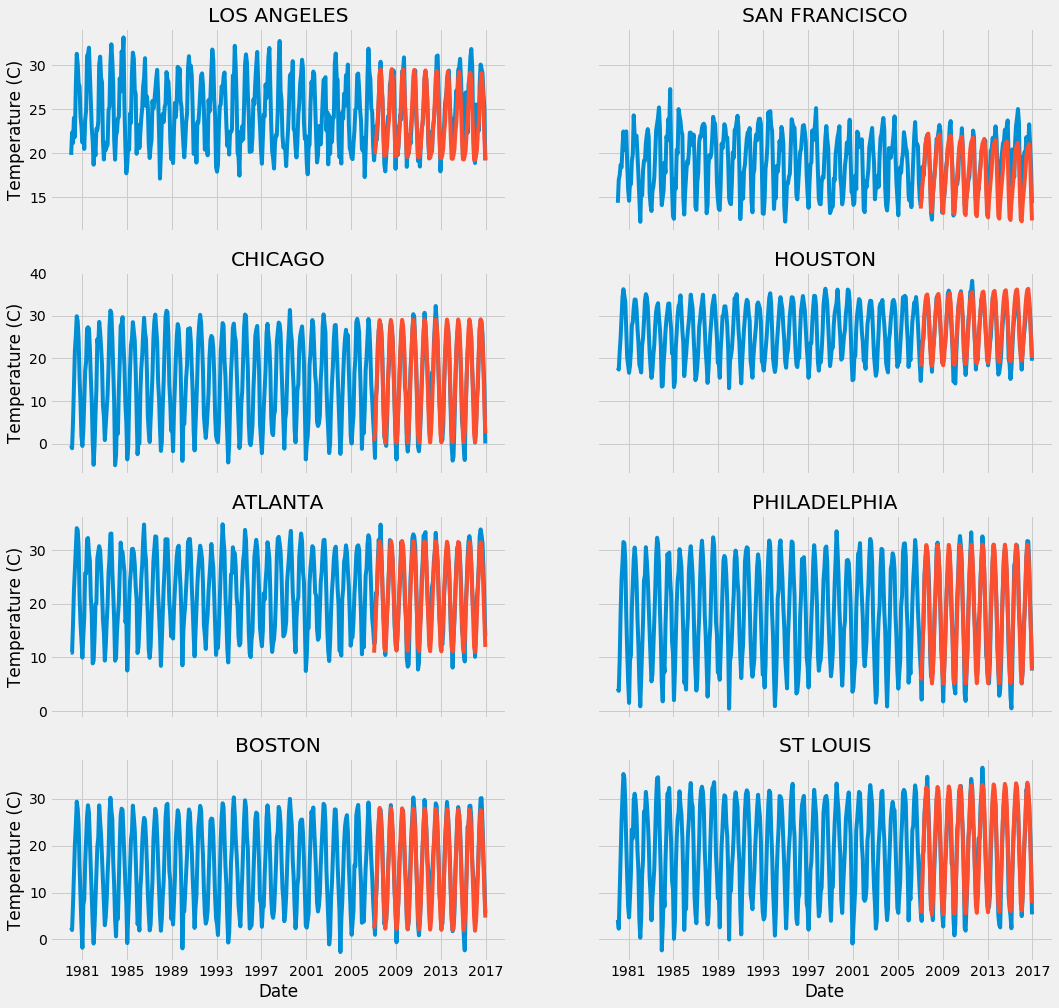

In [153]:
plt.figure(figsize=(12, 12), dpi= 96, facecolor='w', edgecolor='k')

fig, ax = plt.subplots(4, 2, sharex='col', sharey='row')
fig.set_figheight(16)
fig.set_figwidth(16)

counter = 0
for i in range(4):
    for j in range(2):
        ax[i, j].plot(city_df[city_list[counter]])
        ax[i, j].plot(sorted_datetimes[444-120:], future_forecast[city_list[counter]])
        plt.setp(ax[i, j],title=city_list[counter].replace('_', ' ').upper())
        if i == 3:
            plt.setp(ax[i, j], 
                 xlabel = "Date")
        if j == 0:
            plt.setp(ax[i, j], 
                 ylabel = "Temperature (C)")
        counter = counter+1

# This is for specific locations...

# How do we do this for every pixel efficiently?

# Esri/raster-functions
![](https://esri.box.com/shared/static/uwd2yk9i0tjaqoj0sizpe9vd9j8kdzod.png)

https://github.com/Esri/raster-functions/blob/master/functions/SeasonalARIMA.py